In [1]:
#!pip install pymongo
#!pip install python-dotenv

<h4>Load libraries</h4>

In [2]:
import os
import numpy as np
import pandas as pd
import pymongo
import statistics
import matplotlib.pyplot as plt
from matplotlib import cm

<h4>Load environment variables</h4>

In [3]:
%load_ext dotenv
%dotenv

In [4]:
mongo_username = os.environ.get("MONGO_USERNAME")
mongo_password = os.environ.get("MONGO_PASSWORD")

<h4>Connect to database</h4>

In [5]:
mongo_client = pymongo.MongoClient(
    "mongodb://" + str(mongo_username) + ":" + str(mongo_password) + "@localhost:27017")
mongo_db = mongo_client["trading"]

<h4>Load data from database</h4>

In [6]:
data = mongo_db["cross_ma_opt"].find()

In [7]:
timeseries_df = pd.DataFrame(list(data))

<h4>Rate of change calculation with step 30 (days in month)</h4>

In [8]:
step = 30

def rate_of_change(x):
    return [(x[i] - x[i-step]) / x[i-step] for i in range(step, len(x), step)]
    
timeseries_df['change'] = timeseries_df['result'].apply(lambda x: rate_of_change(x))

<h4>Statistics calculations</h4>

In [9]:
timeseries_df['min'] = timeseries_df['change'].apply(lambda x: min(x))
timeseries_df['max'] = timeseries_df['change'].apply(lambda x: max(x))
timeseries_df['average'] = timeseries_df['change'].apply(lambda x: statistics.mean(x))
timeseries_df['std'] = timeseries_df['change'].apply(lambda x: statistics.stdev(x))
timeseries_df['total'] = timeseries_df['result'].apply(lambda x: (x[-1] - x[0]) / x[0])

<h4>ROI</h4>

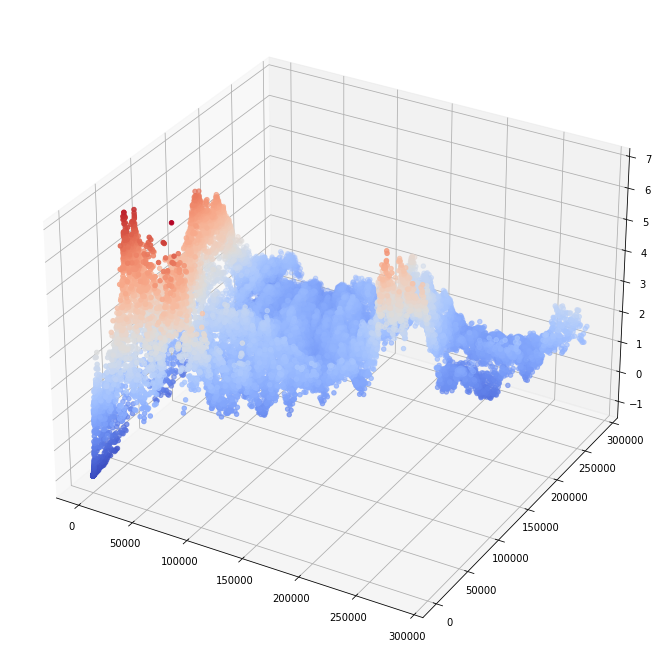

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(timeseries_df['window_1'], timeseries_df['window_2'], timeseries_df['total'], c=timeseries_df['total'], cmap=cm.coolwarm)
plt.show()

<h4>Average monthly rate of change</h4>

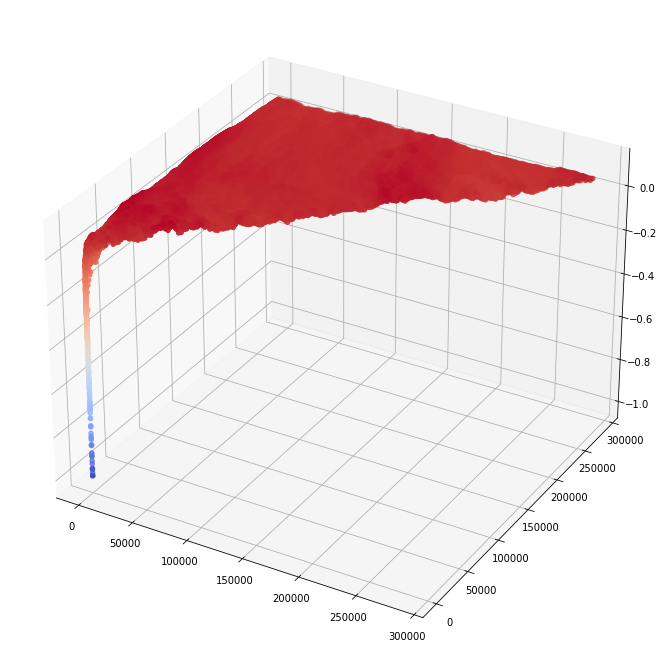

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(timeseries_df['window_1'], timeseries_df['window_2'], timeseries_df['average'], c=timeseries_df['average'], cmap=cm.coolwarm)
plt.show()

<h4>Minimum monthly rate of change</h4>

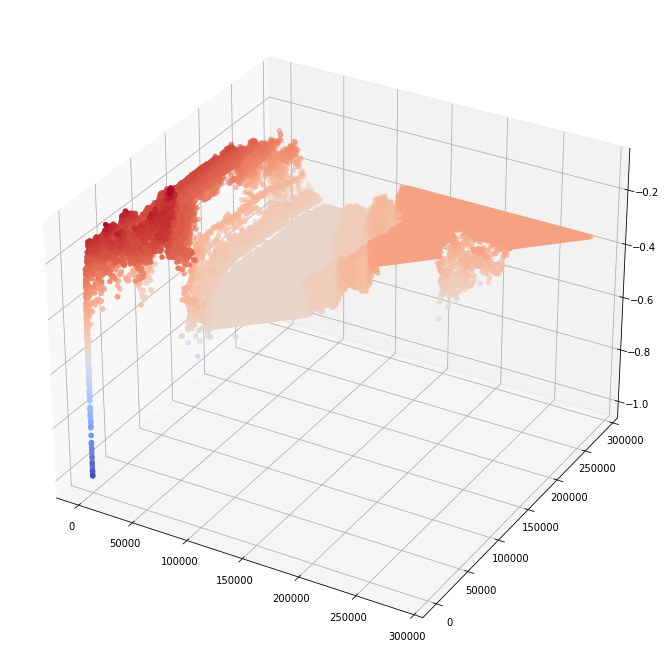

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(timeseries_df['window_1'], timeseries_df['window_2'], timeseries_df['min'], c=timeseries_df['min'], cmap=cm.coolwarm)
plt.show()

<h4>Maximum monthly rate of change</h4>

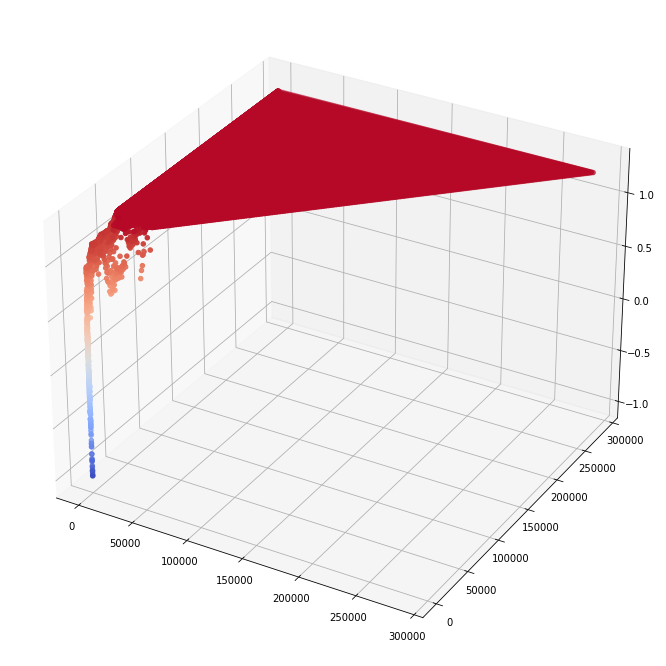

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(timeseries_df['window_1'], timeseries_df['window_2'], timeseries_df['max'], c=timeseries_df['max'], cmap=cm.coolwarm)
plt.show()

<h4>Standart deviation of monthly rate of change</h4>

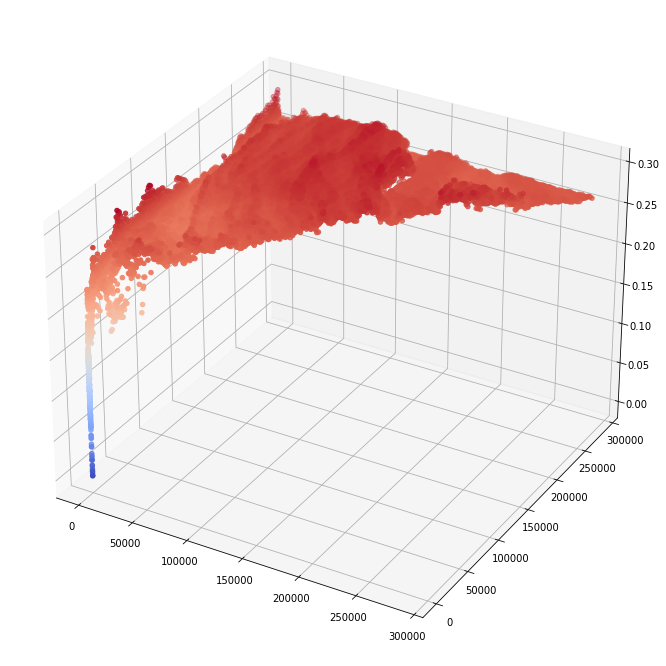

In [14]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(timeseries_df['window_1'], timeseries_df['window_2'], timeseries_df['std'], c=timeseries_df['std'], cmap=cm.coolwarm)
plt.show()